In [1]:
# Import necessary libraries
import numpy as np                # NumPy for numerical operations
import tensorflow as tf           # TensorFlow for deep learning
import matplotlib.pyplot as plt   # Matplotlib for plotting
import requests                   # Requests for making HTTP requests

# Import specific modules from TensorFlow Keras library
from tensorflow.keras.preprocessing import image                         # For image preprocessing
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # For image loading and conversion
from tensorflow.keras.preprocessing.image import ImageDataGenerator      # For data augmentation

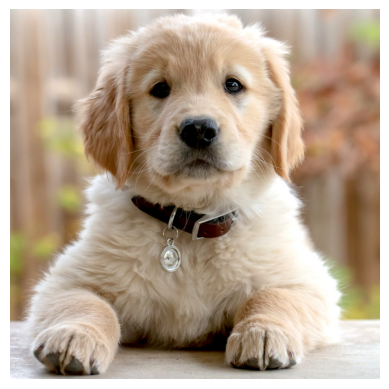

In [2]:
# Load the image using PIL (Python Imaging Library)

image = load_img(r"golder-retriever-puppy.jpeg") # Replace "golder-retriever-puppy.jpeg" with the path to your image file
data = img_to_array(image).astype(int)          # Convert the PIL image to a NumPy array and cast it to integer data type
data = np.expand_dims(data, 0)                  # Expand the dimensions of the NumPy array to make it suitable for plotting

plt.axis('off')     # Turn off the axis in the plot
plt.imshow(data[0]) # Display the image using matplotlib
plt.show()          # Show the plot

In [3]:
# Initialize the ImageDataGenerator with various augmentation parameters

datagen = ImageDataGenerator(
    rotation_range=40,             # Range of degrees for random rotations
    width_shift_range=0.2,         # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,        # Fraction of total height for random vertical shifts
    rescale=1./255,                # Value by which the image is multiplied for scaling (normalization)
    shear_range=0.2,               # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,                # Range for random zooming (e.g., 0.2 means 20% zoom-in/out)
    horizontal_flip=True,          # Randomly flip inputs horizontally
    fill_mode="nearest"            # Strategy used for filling in newly created pixels (e.g., nearest, constant, reflect, wrap)
)

In [4]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Initialize the ImageDataGenerator with various augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,             # Range of degrees for random rotations
    width_shift_range=0.2,         # Fraction of total width for random horizontal shifts
    height_shift_range=0.2,        # Fraction of total height for random vertical shifts
    shear_range=0.2,               # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,                # Range for random zooming (e.g., 0.2 means 20% zoom-in/out)
    horizontal_flip=True,          # Randomly flip inputs horizontally
    fill_mode="nearest"            # Strategy used for filling in newly created pixels (e.g., nearest, constant, reflect, wrap)
)

# Load the image using PIL (Python Imaging Library)
img = load_img("golder-retriever-puppy.jpeg")  # Replace "golder-retriever-puppy.jpeg" with the path to your image file

# Convert the PIL image to a NumPy array
x = img_to_array(img)  # This creates a NumPy array with shape (3, 150, 150)

# Reshape the NumPy array to add a batch dimension, making it (1, 3, 150, 150)
x = x.reshape((1,) + x.shape)

# Counter variable for the number of generated images
count = 0

# Loop through the generated images and save them to the "preview/" directory
for batch in datagen.flow(x, batch_size=1, save_to_dir="preview", save_prefix="gf", save_format="jpeg"):
    count += 1

    # Stop after generating 20 images
    if count > 20:
        break

# This loop generates and saves 21 randomly transformed images using the provided parameters
# It saves them in the "preview/" directory with filenames starting with "gf" and the format is JPEG
# The generator will stop after generating 20 images (as "count > 20" condition will be true) to avoid an infinite loop

In [5]:
def default_datagen():
    datagen = ImageDataGenerator(fill_mode='constant', dtype=int) 
    datagen.fit(data)  # Assuming 'data' is a NumPy array containing the training data
    return datagen

In [6]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
    n_images = n_rows * n_cols                        # Calculate the total number of images to be plotted
    gen_flow = datagen.flow(data)                     # Generate the image data using the specified datagen
    plt.figure(figsize=(n_cols*4, n_rows*3))          # Set the size of the plot

    for image_index in range(n_images):               # Loop through each image index and plot the augmented image
        image = next(gen_flow)                        # Get the next augmented image from the generator
        plt.subplot(n_rows, n_cols, image_index + 1)  # Plot the image in a subplot
        plt.axis("off")                               # Turn off axis in the plot
        plt.imshow(image[0], vmin=0, vmax=255)        # Display the augmented image
    plt.show()                                        # Show the plot with all augmented images

**Create that function to shows the effect of individual augmentation parameters.**

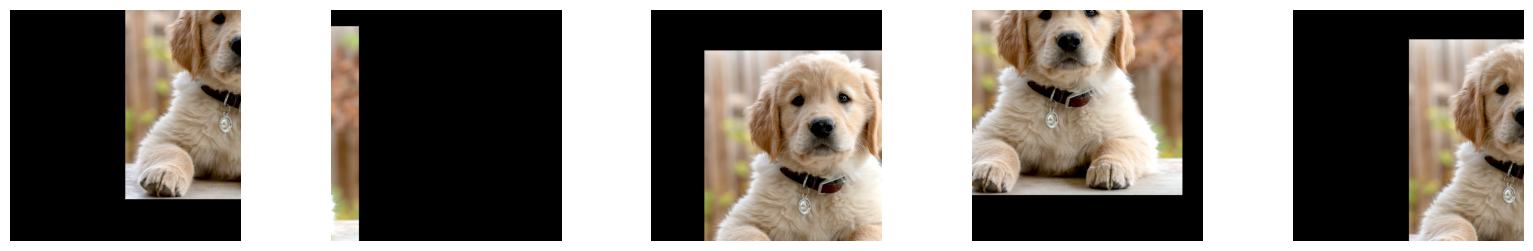

In [7]:
datagen = default_datagen()      # Create the default data generator
datagen.width_shift_range = 0.2  # Set the width shift range to 0.2
datagen.height_shift_range = 0.9 # Set the height shift range to 0.9
plot_augmentation(datagen, data) # Plot the augmented images using the modified data generator

**Effects of width_shift_range & height_shift_range parameter.**

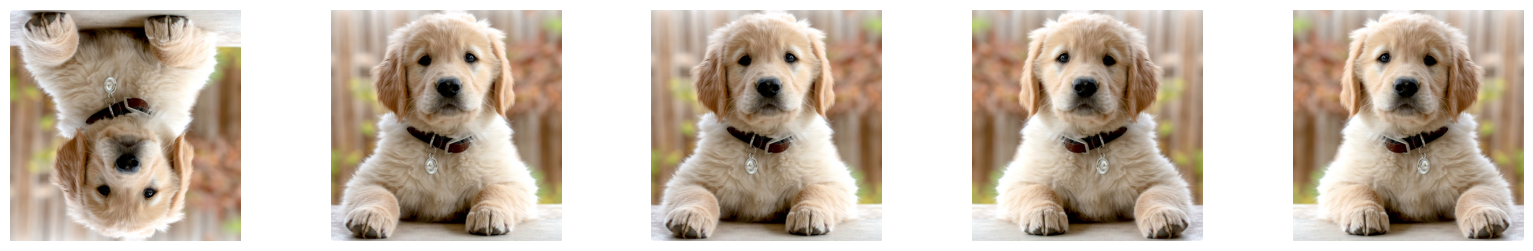

In [8]:
datagen = default_datagen()
datagen.horizontal_flip = True   # Set the horizontal_flip to True
datagen.vertical_flip = True     # Set the vertical_flip to True
plot_augmentation(datagen, data) # Plot the augmented images using the modified data generator

**Effects of horizontal_flip & vertical_flip parameter.**

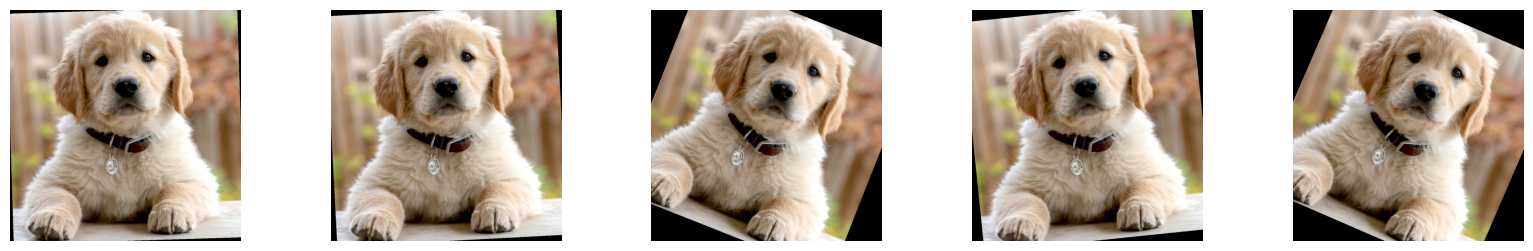

In [9]:
datagen = default_datagen()
datagen.rotation_range = 25      # Set the rotation_range to 25
plot_augmentation(datagen, data) # Plot the augmented images using the modified data generator

**Effects of rotation_range parameter.**

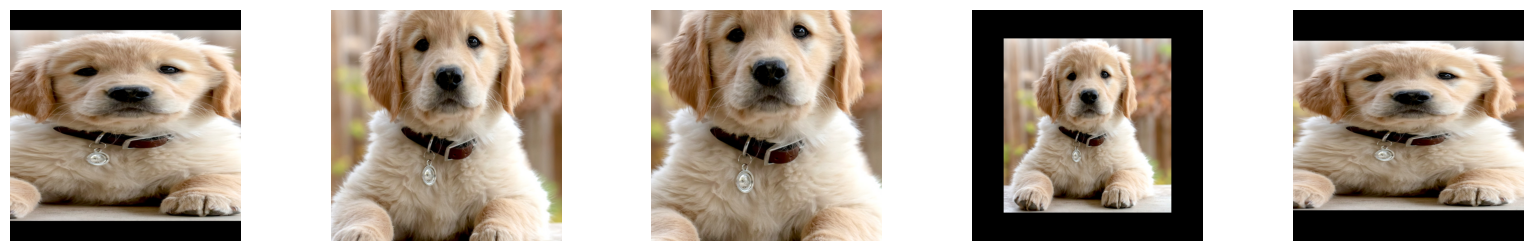

In [10]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

**Effects of zoom_range parameter.**

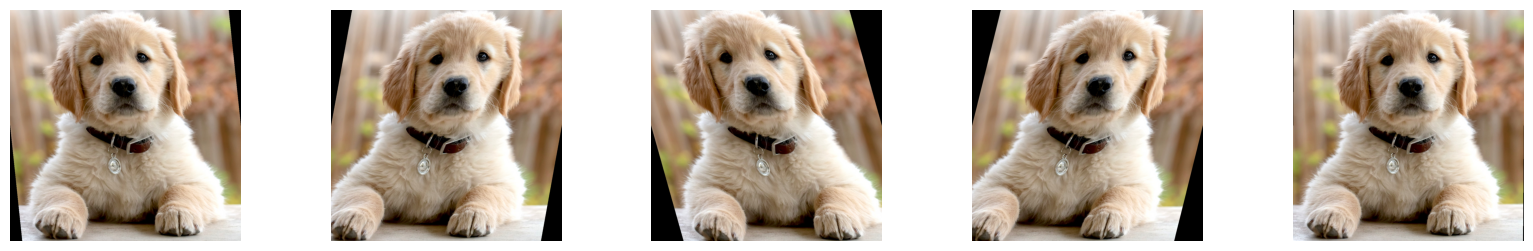

In [11]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

**Effects of shear_range parameter.**


**shear range, resulting in randomly sheared images with an intensity of 20 degrees.**

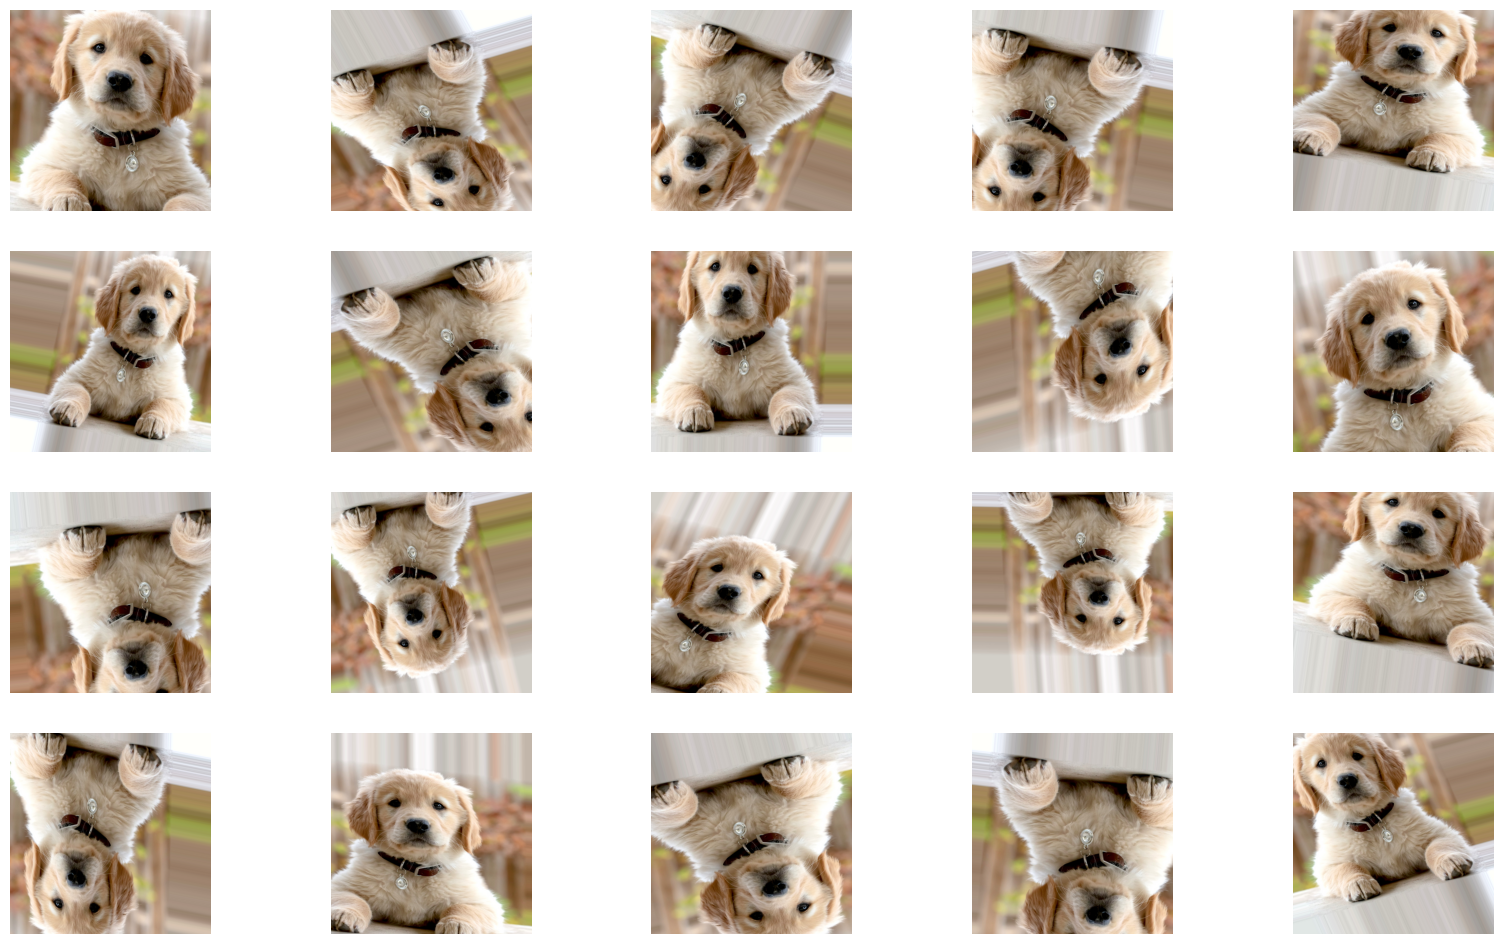

In [12]:
datagen.fill_mode = 'nearest'
datagen.horizontal_flip = True
datagen.vertical_flip = True
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
datagen.zoom_range = [0.8, 1.2]
datagen.rotation_range = 20
datagen.shear_range = 10
plot_augmentation(datagen, data, n_rows=4, n_cols=5) # Plot the augmented images using the modified data generator